# PROJECT 1

## Team Info

Our team members are as follows:

**Simon Ustoyev

**Jack Russo

**Elina Azrilyan

**Anil Akyildirim


For this Centrality Measures project, we chose to use a dataset which includes data on intra-organizational networks. The dataset and the details can be found here: https://toreopsahl.com/datasets/#Cross_Parker

This intra-organizational network contains data about a research team in a manufacturing company (77 employees). In addition to the relational data, the dataset also contains information about the people (nodal attributes).

This network is based on the employees’ awareness of each others’ knowledge and skills and the weights are asigned based on the following criteria: (“I understand this person’s knowledge and skills."). The weight scale in this network is: 0: I Do Not Know This Person/I Have Never Met this Person; 1: Strongly Disagree; 2: Disagree; 3: Somewhat Disagree; 4: Somewhat Agree; 5: Agree; and 6: Strongly Agree.

In terms of categorical variable, we will be using the tenure of the people. The following attributes will be added to the dataset for the researchers in the manufacturing company:
1: 1-12 months; 2: 13-36 months; 3: 37-60 months; 4: 61+ months

Video Recodring: https://screencast-o-matic.com/watch/cY1Y2MCKQP

In [148]:
# Load Packages
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from pylab import rcParams

In [149]:
#Reading in the data
df = pd.read_csv('http://opsahl.co.uk/tnet/datasets/Cross_Parker-Manufacturing_info.txt', delim_whitespace=True, header=None, names=['source', 'target', 'weight'])
df.head()

,source,target,weight
0,1,2,5
1,1,3,1
2,1,5,1
3,1,6,1
4,1,9,5


In [150]:
df.count()

source    2228
target    2228
weight    2228
dtype: int64

We can see that our dataset includes 77 nodes and 2,228 edges. We will now read in and merge tenure information. 

In [151]:
# read network data set 2 with tenure information
df_ten = pd.read_csv('http://opsahl.co.uk/tnet/datasets/Cross_Parker-Manufacturing-tenure.txt', delim_whitespace=True, header=None)
df_ten.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,2,3,2,4,3,2,2,2,4,2,...,3,4,1,4,3,4,4,2,2,4


In [152]:
df_ten_t = df_ten.transpose()
df_ten_t.loc[:,'source'] = range(1,78)
#df_ten_t.tail()

In [153]:
df_new = pd.merge(df, df_ten_t, on='source')
df_new.columns=["source", "target", "weight", "tenure"]
df_new.head()

,source,target,weight,tenure
0,1,2,5,2
1,1,3,1,2
2,1,5,1,2
3,1,6,1,2
4,1,9,5,2


In [154]:
df_new.tail()

,source,target,weight,tenure
2223,77,72,2,4
2224,77,73,1,4
2225,77,74,1,4
2226,77,75,4,4
2227,77,76,1,4


In [155]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2227
Data columns (total 4 columns):
source    2228 non-null int64
target    2228 non-null int64
weight    2228 non-null int64
tenure    2228 non-null int64
dtypes: int64(4)
memory usage: 87.0 KB


# Data Exploration

Let's create our Graph object first and then we can further perform basic analysis and initial visualizations.

In [156]:
# create Graph object
# # reference - https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html
G = nx.from_pandas_edgelist(df_new,  source='source', target='target', edge_attr='weight', create_using=None)

In [157]:
# lets get basic information
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 77\nNumber of edges: 1341\nAverage degree:  34.8312'

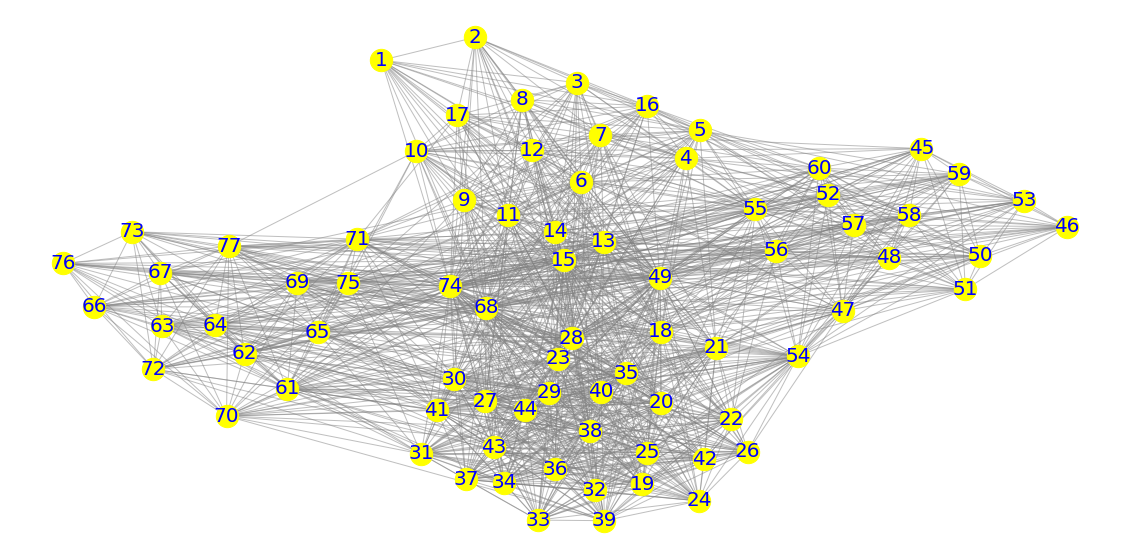

In [158]:
#reference https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
plt.figure(figsize=(20,10))
pos=nx.spring_layout(G,k=None, iterations=100)
pos_labels={}
keys=pos.keys()
for key in keys:
    x,y=pos[key]
    pos_labels[key]=(x,y)
nx.draw_networkx_labels(G, pos_labels, font_color='Blue', font_size=20)
nx.draw_networkx_edges(G, pos, edge_color="Gray", alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color="Yellow", node_size=500)
plt.axis("off")
plt.show()

Based on our initial look at the network, we see that, we have 77 nodes and 1341 edges. We didnt include any weight to our visualization. Let's create another one but this time include the weight between the nodes.

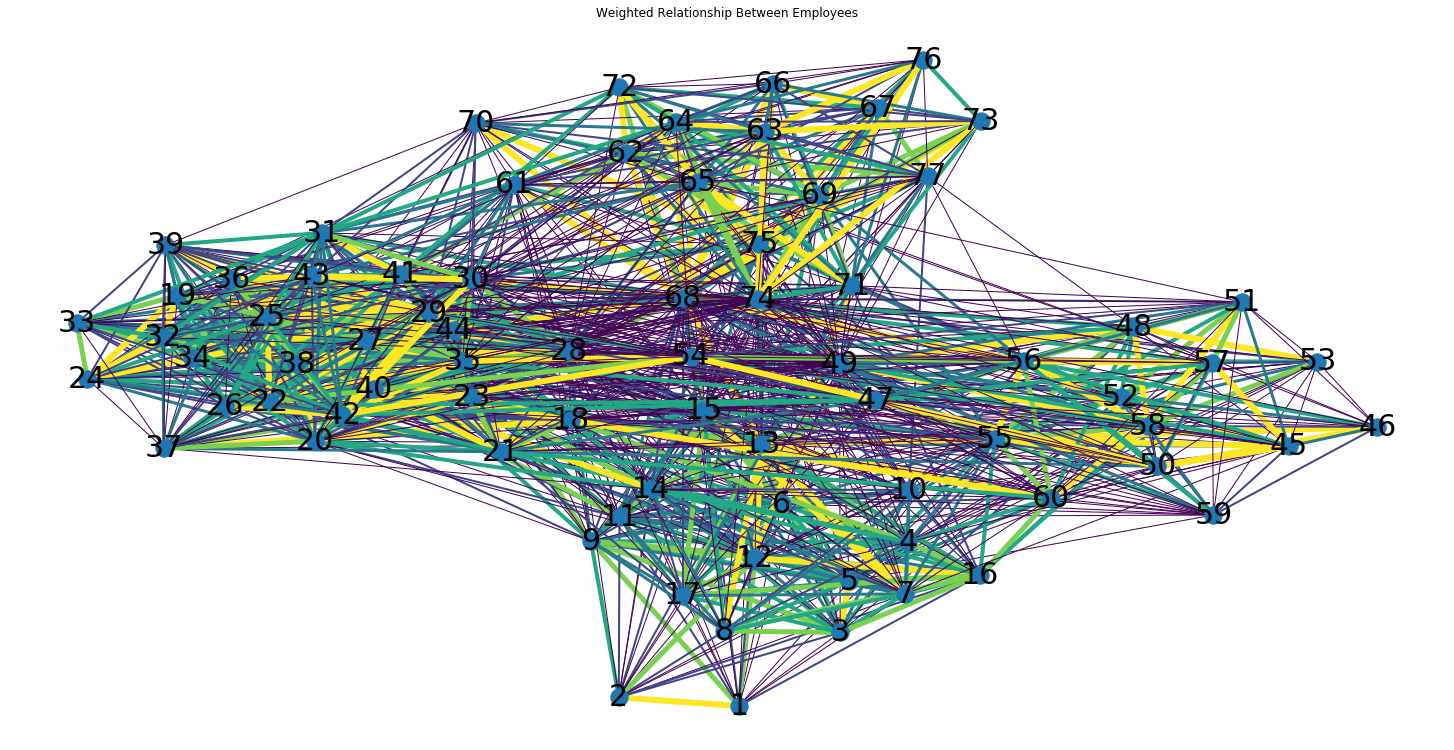

In [159]:
#define the weight 
plt.figure(figsize=(20,10))
#defining weights - reference Book Social Network Analysis page 104
weight=[edata['weight'] for f,t,edata in G.edges(data=True)]
nx.draw(G, width=weight, edge_color=weight, with_labels=True, font_size=30)
plt.axis("off")
plt.title("Weighted Relationship Between Employees")
plt.show()

Even though we visualized the employee relationship and connection with weight, the visualization doesnt neccessarily tells us which employees are important. We will further look at the Degree Centrality and Betweenness Centrality. The more connections and neighbours the employee has, we can assume that they are more important. Let's look at how many number of neighbours each node has.

In [160]:
# Compute the degree of every node: degrees
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

# Print the degrees
print(degrees)

[18, 19, 24, 32, 36, 32, 37, 30, 58, 76, 25, 23, 29, 20, 29, 28, 36, 54, 28, 40, 76, 35, 43, 24, 22, 27, 28, 49, 76, 26, 33, 26, 25, 38, 37, 30, 22, 28, 35, 23, 40, 76, 34, 46, 41, 76, 31, 29, 48, 43, 32, 40, 36, 33, 34, 19, 48, 37, 33, 31, 36, 47, 38, 31, 31, 33, 32, 32, 36, 22, 26, 27, 22, 26, 22, 18, 19]


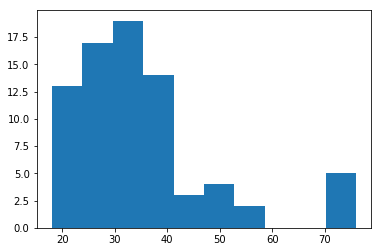

In [161]:
plt.figure()
plt.hist(degrees)
plt.show()

In [162]:
max(degrees)

76

When we look at the degree distribution (the number of neighbours each employee has) we see that maximum neighbour of a node is 76. Let's find who those employees are.

In [163]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

In [164]:
seventsix_nbrs = nodes_with_m_nbrs(G, 76)
print(seventsix_nbrs)

{68, 74, 15, 49, 28}


Employees 68, 74, 15 and 28 has the highest number of neighbours and can be considered as important within the employee network. However, let's also look at the degree centrality which is the number of neighbours of the employee divided by all the possible neighbours that that employee could have.

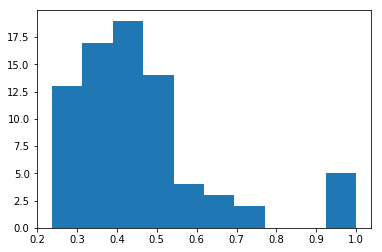

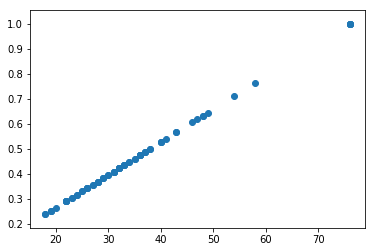

In [165]:
# Compute the degree centrality of the network: deg_cent
deg_cent = nx.degree_centrality(G)

# Plot a histogram of the degree centrality distribution of the graph
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

When we look at the degree centrality and the degree of the network, we see that (naturally) they are highly correlated.

We looked at the degree centrality and the degree of nodes and found out that {68, 74, 15, 49, 28} employees has the most neighbours and possibly the most important employees. We can do the same to see the least degree (the number neighbours) in a network and find those employees.

In [166]:
min(degrees)

18

In [167]:
eightteen_nbrs = nodes_with_m_nbrs(G, 18)
print(eightteen_nbrs)

{73, 1}


Let's look at to see if there is any connection between the important employees and least important employees. We will look to see if there is a path between these employees in our network. We will use "Breadth-First-Search" Algorithm which start from a particular employee and iteratively search through the their neighbours and neighbours' neighbours to get to the destination emplopyee.

In [168]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

In [169]:
node_68_1=path_exists(G, 68, 1)
print(node_68_1)

Path exists between nodes 68 and 1
True


We see that there is a path between these two employees. Let's look at the shortest path lenght.


In [170]:
# Reference https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html
nx.shortest_path_length(G, source=68, target=1, weight=None)

1

They are connected directly. Maybe this was expected as the employee with most connection is also connected with the employee with least connection.

Let's now look at these employees tenure to see if there is a connection.

In [171]:
df_new.loc[df['source'] == 68].head(1)

,source,target,weight,tenure
1935,68,1,1,3


When we look at the employee with most neighbours, we see that his tenure is 3:37-60 months.

In [172]:
df_new.loc[df['source'] == 1].head(1)

,source,target,weight,tenure
0,1,2,5,2


When we look at the employee with the least neighbours we see that his/her tenure is 2: 13-36 months.

## Betweenness Centrality

We can also use Betweenness Centrality as part of an importance metric. Betweenness centrality uses shortest paths in a network and defined as the fraction of all possible shortest paths between any pair of ndoes that pass through the node. Let's look at the betweenness centrality and visualize the network.

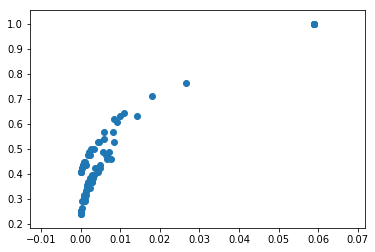

In [209]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(G)

# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()

In [174]:
#nx.betweenness_centrality(G)

In [175]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(G)
print(top_bc)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(G)[node] == max(nx.betweenness_centrality(G).values())

{68, 74, 15, 49, 28}


When we look at the degree of centrality and betweenness centrality, we see that the employees that we come up with the same list of highly trusted employees.

Now let's take a look at the Network graphs by Tenure.

In [203]:
#Function that takes the dataframe and tenure category and plots the graph for all nodes in that category
def island_graph(df_,t):
  return(nx.from_pandas_edgelist(df = (df_[df_['tenure'] == t]), source='source', target='target', edge_attr='weight', create_using=None))

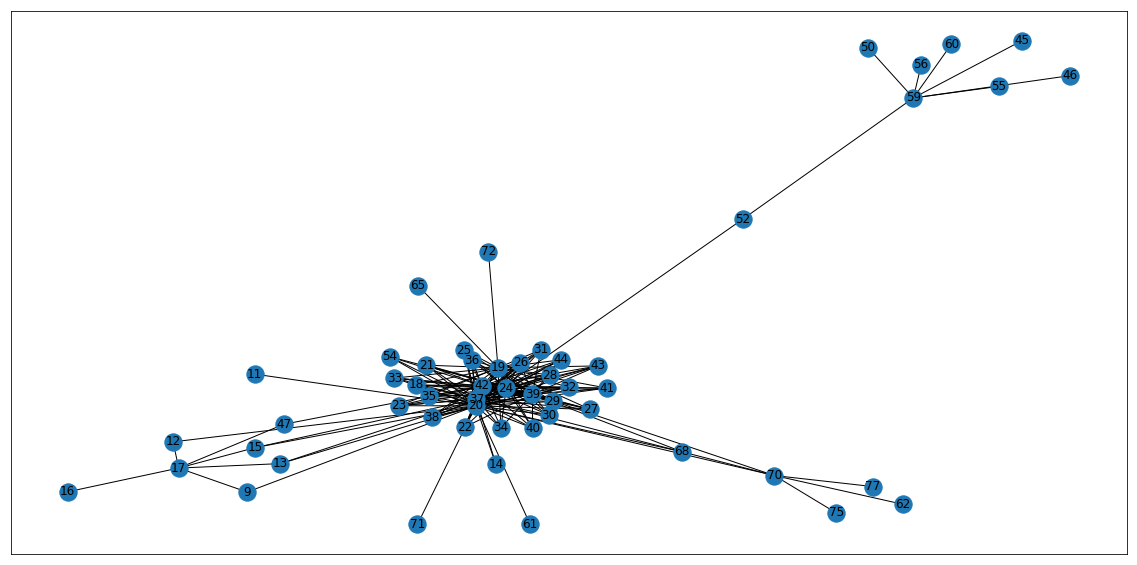

In [204]:
#Tenure = 1
plt.figure(figsize=(20,10))
nx.draw_networkx(G = island_graph(df_ = df_new, t = 1))

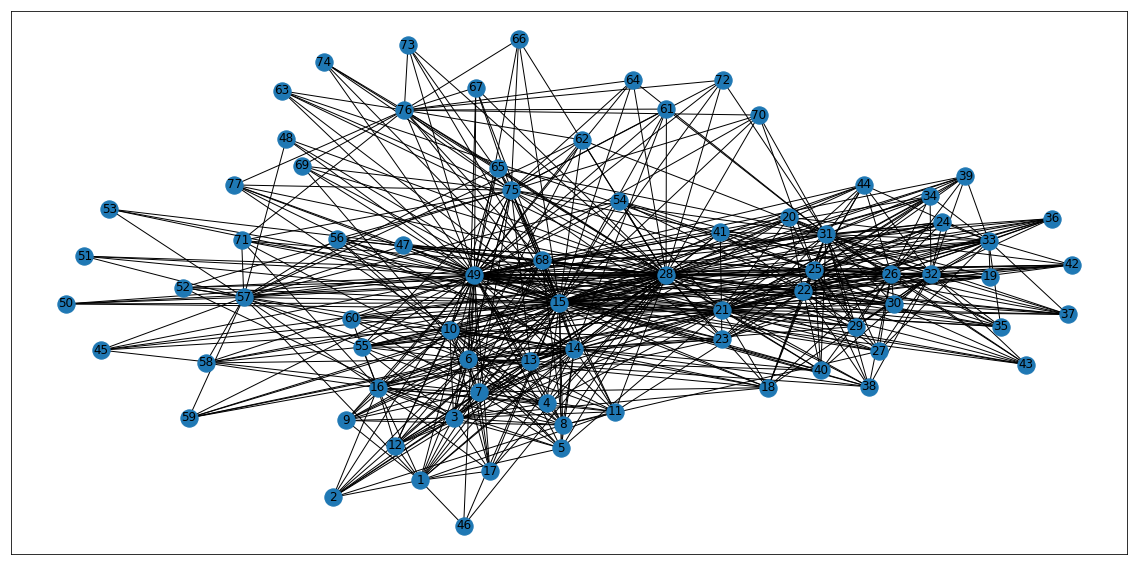

In [205]:
#Tenure = 2
plt.figure(figsize=(20,10))
nx.draw_networkx(G = island_graph(df_ = df_new, t = 2))

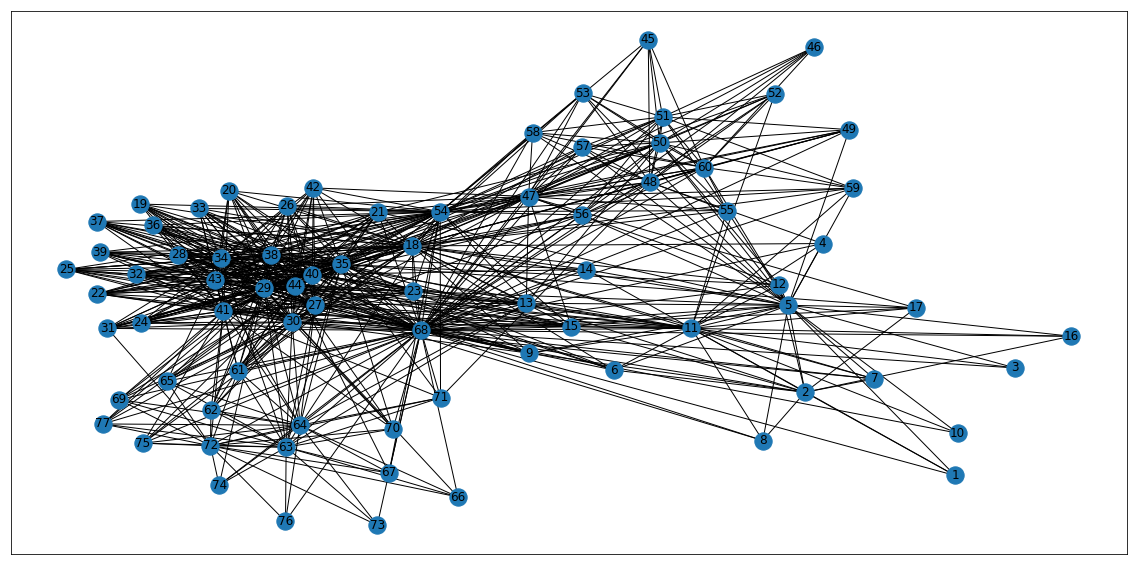

In [201]:
#Tenure = 3
plt.figure(figsize=(20,10))
nx.draw_networkx(G = island_graph(df_ = df_new, t = 3))

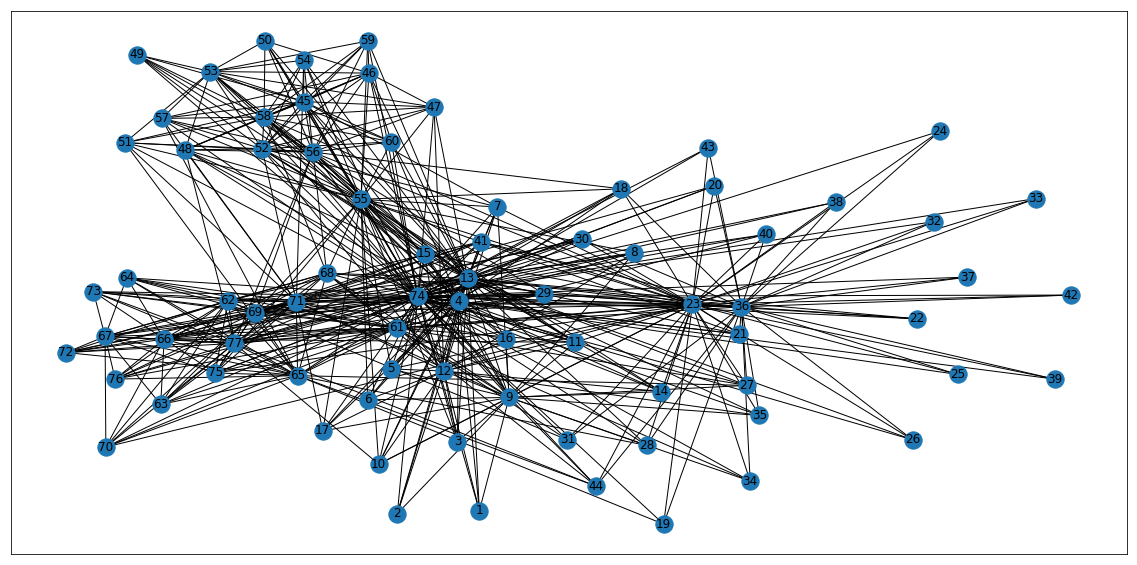

In [202]:
#Tenure = 4
plt.figure(figsize=(20,10))
nx.draw_networkx(G = island_graph(df_ = df_new, t = 4))